In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df_2015 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name=0)
df_2015.to_csv('capturas_2015-2020_año2015.csv', index=False)

In [3]:
df_2017 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name=3)
df_2017.to_csv('capturas_2015-2020_año2017.csv', index=False)

In [4]:
df_2020 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name=6)
df_2020.to_csv('capturas_2015-2020_año2020.csv', index=False)

In [5]:
df_2015 = pd.read_csv('capturas_2015-2020_año2015.csv')
df_2017 = pd.read_csv('capturas_2015-2020_año2017.csv')
df_2020 = pd.read_csv('capturas_2015-2020_año2020.csv')

### 1.- Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes de los años 2015, 2017, 2020. Es decir, una gráfica por cada año donde el eje horizontal esté el mes y el vertical el promedio de diaphorinas por trampa.

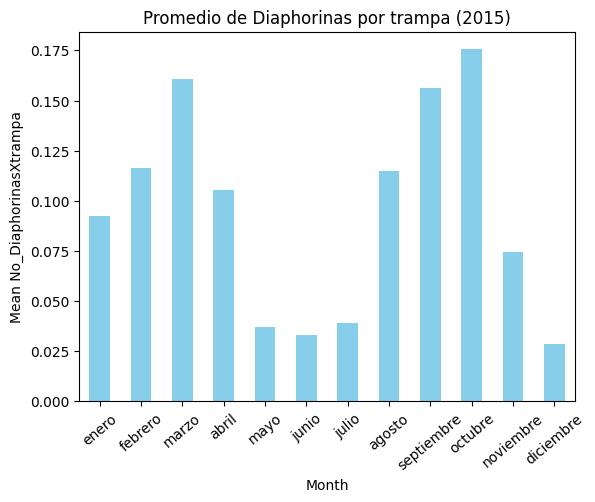

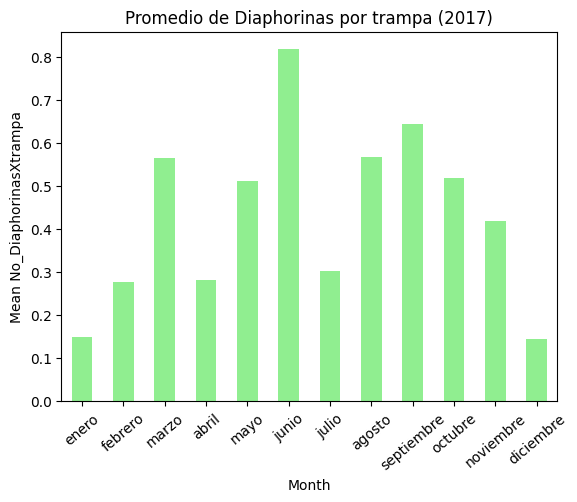

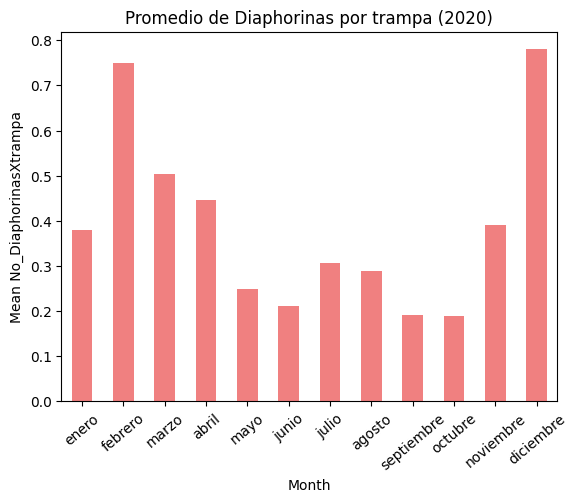

In [6]:
df_2015 = df_2015.dropna(subset=['Fecha'])
month_names = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
monthly_mean = df_2015.groupby('Mes')['No_DiaphorinasXtrampa'].mean()
monthly_mean.plot(kind='bar', color='skyblue')
plt.title('Promedio de Diaphorinas por trampa (2015)')
plt.xlabel('Month')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.xticks(ticks=range(12), labels=month_names, rotation=40)
plt.show()

df_2017 = df_2017.dropna(subset=['Fecha'])
monthly_mean = df_2017.groupby('Mes')['No_DiaphorinasXtrampa'].mean()
monthly_mean.plot(kind='bar', color='lightgreen')
plt.title('Promedio de Diaphorinas por trampa (2017)')
plt.xlabel('Month')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.xticks(ticks=range(12), labels=month_names, rotation=40)
plt.show()

df_2020 = df_2020.dropna(subset=['Fecha'])
monthly_mean = df_2020.groupby('Mes')['DiaphorinaXTrampa'].mean()
monthly_mean.plot(kind='bar', color='lightcoral')
plt.title('Promedio de Diaphorinas por trampa (2020)')
plt.xlabel('Month')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.xticks(ticks=range(12), labels=month_names, rotation=40)
plt.show()


### 2.- Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes del año 2020 pero sólo de un municipio.

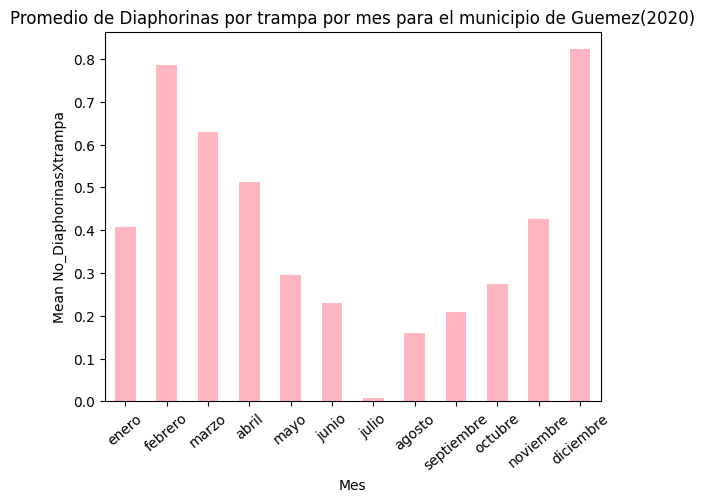

In [10]:
df_2020 = df_2020.dropna(subset=['Fecha'])
df_2020_guemez = df_2020[df_2020['Municipio'] == 'GUEMEZ']
month_names = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
monthly_mean = df_2020_guemez.groupby('Mes')['DiaphorinaXTrampa'].mean()
monthly_mean.plot(kind='bar', color='lightpink')
plt.title('Promedio de Diaphorinas por trampa por mes para el municipio de Guemez(2020)')
plt.xlabel('Mes')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.xticks(ticks=range(12), labels=month_names, rotation=40)
plt.show()


### 3.- Hacer una tabla donde la primera columna sea el mes, la segunda el  índice Id (por trampa) y la tercera el índice Cx para el año 2015.

In [90]:
df_2015['Fecha'] = pd.to_datetime(df_2015['Fecha'])
df_2015['Month'] = df_2015['Fecha'].dt.month
summary_df = df_2015.groupby(['Month', 'Ubicacion'])['No_DiaphorinasXtrampa'].agg('mean').reset_index()

coef_disp = summary_df.groupby('Month')['No_DiaphorinasXtrampa'].agg(lambda x: x.var() / x.mean()).reset_index(name='Id')
coef_cx = summary_df.groupby('Month')['No_DiaphorinasXtrampa'].agg(lambda x: (x.var() / x.mean() - 1)/ (x.sum()-1)).reset_index(name='Cx')

monthly_summary = pd.merge(coef_disp, coef_cx, on='Month')

monthly_summary.head(20)


,Month,Id,Cx
0,1,0.983414,-0.004384
1,2,1.300031,0.000330
2,3,1.695463,0.000530
3,4,0.878201,-0.000171
4,5,0.737925,-0.000880
5,6,1.338007,0.001330
6,7,1.681968,0.002132
7,8,2.537507,0.001734
8,9,3.004288,0.001564
9,10,4.523984,0.002683


In [95]:
# Poner todas las hojas del excel en un sólo archivo para el siguiente ejercicio
file_name = 'capturas_2015-2020.xlsx'

dataframes = []

columns_to_keep = {
    0: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa'],
    1: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa'],
    2: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa'],
    3: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa'],
    4: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa'],
    5: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa'],
    6: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa']
}

for sheet_index in range(7):
    df = pd.read_excel(file_name, sheet_name=sheet_index)
    df = df[columns_to_keep[sheet_index]]
    dataframes.append(df)

final_df = pd.concat(dataframes, ignore_index=True)
final_df.to_csv('capturas_2015-2020_concat.csv', index=False)


In [139]:
#Poner en formato adecuado las fechas
df = df.dropna(subset=['Fecha'])
df.loc[df['Fecha'].str.contains('2019|2020'), 'Fecha'] = pd.to_datetime(df.loc[df['Fecha'].str.contains('2019|2020'), 'Fecha'], format='%d/%m/%Y').dt.strftime('%m/%d/%Y')
df.to_csv('capturas_2015-2020_concat_version.csv', index=False)

In [168]:
df= pd.read_csv('capturas_2015-2020_concat_version.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Month'] = df['Fecha'].dt.month

summary_df = df.groupby(['Month', 'Ubicacion'])['No_DiaphorinasXtrampa'].agg('mean').reset_index()

coef_disp = summary_df.groupby('Month')['No_DiaphorinasXtrampa'].agg(lambda x: x.var() / x.mean()).reset_index(name='Id')
coef_cx = summary_df.groupby('Month')['No_DiaphorinasXtrampa'].agg(lambda x: (x.var() / x.mean() - 1)/ (x.sum()-1)).reset_index(name='Cx')

monthly_summary = pd.merge(coef_disp, coef_cx, on='Month')

monthly_summary.head(20)


,Month,Id,Cx
0,1,1.764652,0.000285
1,2,2.434544,0.000286
2,3,3.547276,0.000428
3,4,1.982853,0.000293
4,5,3.543448,0.000549
5,6,13.253200,0.002319
6,7,3.526464,0.000708
7,8,2.285468,0.000269
8,9,2.593931,0.000258
9,10,4.174332,0.000546


### 4.- Hacer una gráfica del índice Id (por trampa) como función del mes que abarque desde 2015 hasta 2020.

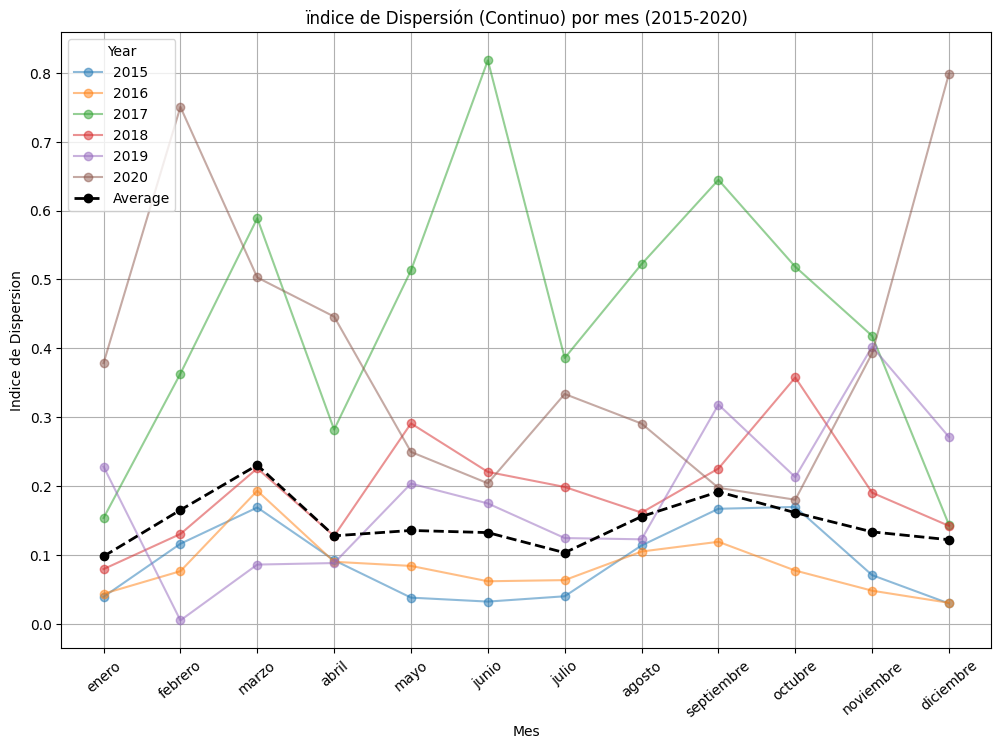

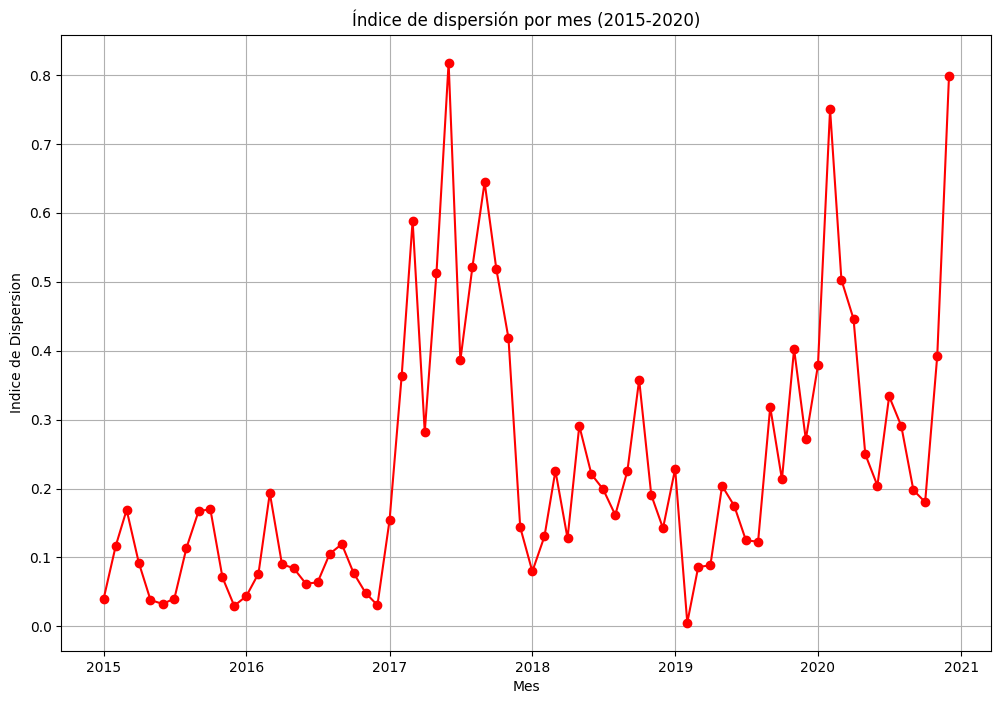

In [248]:
df= pd.read_csv('capturas_2015-2020_concat_version.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Month'] = df['Fecha'].dt.month

df_monthly = df.groupby('Month')['No_DiaphorinasXtrampa'].agg('mean').reset_index()
df['Year'] = df['Fecha'].dt.year
df['Month'] = df['Fecha'].dt.month
plt.figure(figsize=(12, 8))
for year in df['Year'].unique():
    df_yearly = df[df['Year'] == year].groupby('Month')['No_DiaphorinasXtrampa'].mean().reset_index()
    plt.plot(df_yearly['Month'], df_yearly['No_DiaphorinasXtrampa'], marker='o', label=str(year), alpha=0.5)

df_avg = df.groupby('Month')['No_DiaphorinasXtrampa'].mean().reset_index()
plt.plot(df_avg['Month'], df_avg['No_DiaphorinasXtrampa'], marker='o', color='black', linestyle='--', label='Average', linewidth=2)

plt.title('ïndice de Dispersión (Continuo) por mes (2015-2020)')
plt.xlabel('Mes')
plt.ylabel('Indice de Dispersion')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=40)
plt.grid(True)
plt.legend(title='Year')
plt.show()


df['Year'] = df['Fecha'].dt.year
df['Month'] = df['Fecha'].dt.month

df_continuous = df.groupby(['Year', 'Month'])['No_DiaphorinasXtrampa'].mean().reset_index()

df_continuous['Time'] = df_continuous['Year'].astype(str) + '-' + df_continuous['Month'].astype(str).str.zfill(2)
df_continuous['Time'] = pd.to_datetime(df_continuous['Time'])

plt.figure(figsize=(12, 8))
plt.plot(df_continuous['Time'], df_continuous['No_DiaphorinasXtrampa'], marker='o', color='red')
plt.title('Índice de dispersión por mes (2015-2020)')
plt.xlabel('Mes')
plt.ylabel('Indice de Dispersion')
plt.grid(True)
plt.show()


### 5.- Hacer una gráfica del centro de masa de las diaphorinas como función del mes que abarque de 2017 a 2020. Nota : CM=pos*Diaph/Ntrampas,donde CM se refiere al centro de masa, pos es la posición de la trampa, Diaph es el promedio de diaphorinas en la trampa y Ntrampas es el número de trampas que se consideraron en el cálculo.

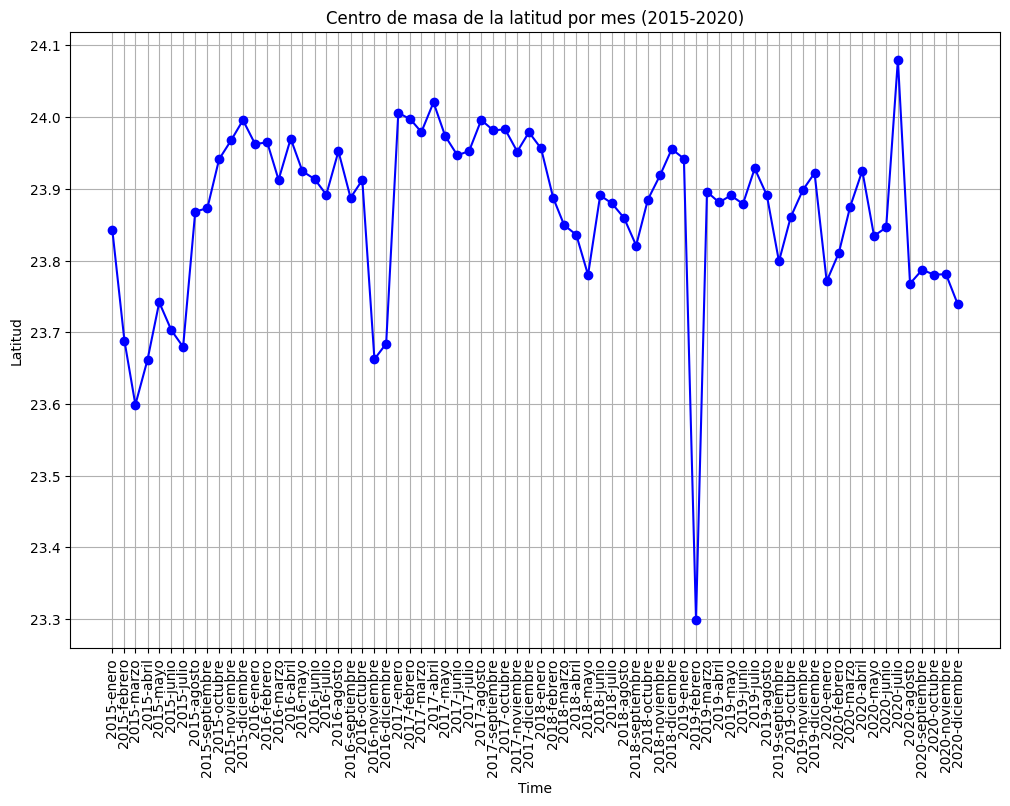

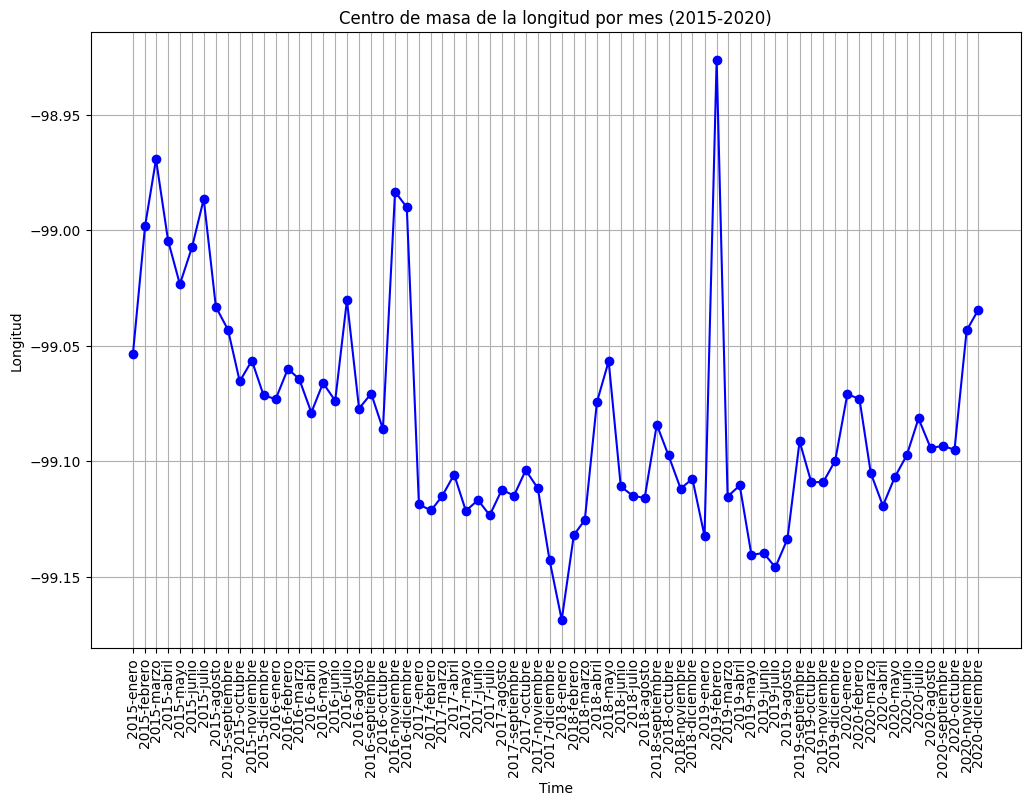

In [242]:
df = pd.read_csv('capturas_2015-2020_concat_version.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Month'] = df['Fecha'].dt.month
df['Year'] = df['Fecha'].dt.year

summary_df = df.groupby(['Year', 'Month'])[['No_DiaphorinasXtrampa','Latitud','Longitud']]

cm_latitud_y = summary_df.apply(lambda x: (x['No_DiaphorinasXtrampa'] * x['Latitud']).sum() / x['No_DiaphorinasXtrampa'].sum()).reset_index(name='cm_lat_y')

cm_longitud_x = summary_df.apply(lambda x: (x['Longitud'] * x['No_DiaphorinasXtrampa']).sum() / x['No_DiaphorinasXtrampa'].sum()).reset_index(name='cm_long_x')

plt.figure(figsize=(12, 8))
cm_latitud_y['Time'] = cm_latitud_y['Year'].astype(str) + '-' + cm_latitud_y['Month'].astype(str).str.zfill(2)
cm_latitud_y['Time'] = pd.to_datetime(cm_latitud_y['Time'])
plt.plot(cm_latitud_y['Time'], cm_latitud_y['cm_lat_y'], marker='o', color='b')
plt.title('Centro de masa de la latitud por mes (2015-2020)')
plt.xlabel('Time')
plt.ylabel('Latitud')
plt.xticks(ticks=cm_latitud_y['Time'], labels=cm_latitud_y['Year'].astype(str) + '-' + cm_latitud_y['Month'].apply(lambda x: month_names[x-1]), rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
cm_longitud_x['Time'] = cm_longitud_x['Year'].astype(str) + '-' + cm_longitud_x['Month'].astype(str).str.zfill(2)
cm_longitud_x['Time'] = pd.to_datetime(cm_longitud_x['Time'])
plt.plot(cm_longitud_x['Time'], cm_longitud_x['cm_long_x'], marker='o', color='b')
plt.title('Centro de masa de la longitud por mes (2015-2020)')
plt.xlabel('Time')
plt.ylabel('Longitud')
plt.xticks(ticks=cm_longitud_x['Time'], labels=cm_longitud_x['Year'].astype(str) + '-' + cm_longitud_x['Month'].apply(lambda x: month_names[x-1]), rotation=90)
plt.grid(True)
plt.show()